#EDA- Assignment

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")


Q1-Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [3]:
# First 10 rows
print(df.head(10))

# Shape
print("Shape:", df.shape)

# Column names
print("Columns:", df.columns.tolist())


                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000     

Q2-Check for missing values in all columns and describe your approach for
handling them

In [4]:
# Missing values count
print(df.isnull().sum())

# Handling: Fill numeric NaN with median, categorical NaN with mode
df_cleaned = df.copy()
for col in df_cleaned.columns:
    if df_cleaned[col].dtype in ['int64','float64']:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Check again
print(df_cleaned.isnull().sum())


name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-1280232891.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
/tmp/ipython-input-1280232891.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Q3-Plot the distribution of selling prices using a histogram and describe the
overall trend.


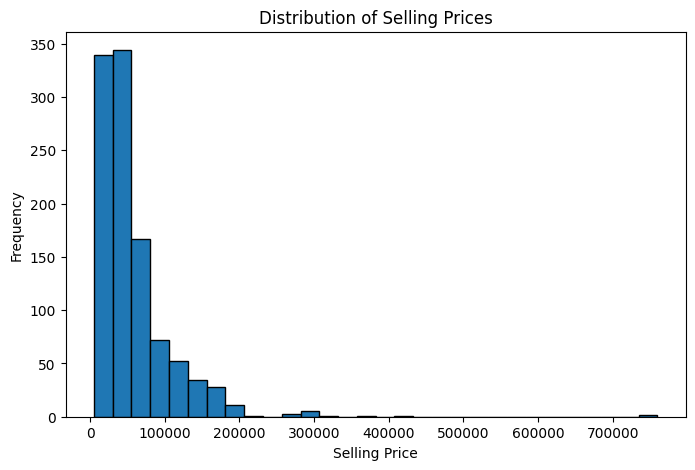

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df_cleaned['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()


Q4-Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


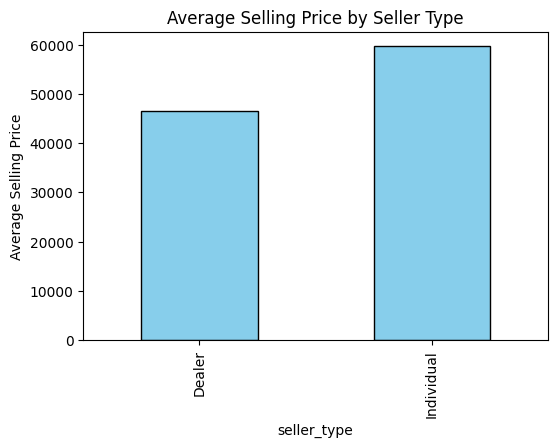

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [6]:
avg_price_by_seller = df_cleaned.groupby("seller_type")["selling_price"].mean()

plt.figure(figsize=(6,4))
avg_price_by_seller.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Average Selling Price")
plt.show()

print(avg_price_by_seller)


Q5-Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

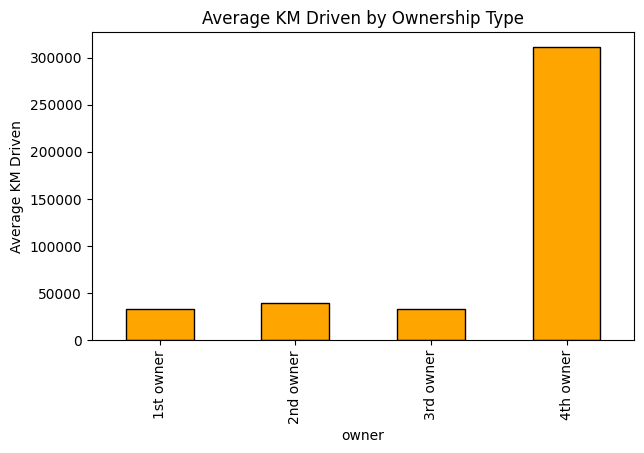

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [7]:
avg_km_by_owner = df_cleaned.groupby("owner")["km_driven"].mean()

plt.figure(figsize=(7,4))
avg_km_by_owner.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average KM Driven by Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()

print(avg_km_by_owner)


Q6-Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [8]:
# Before
print("Before outlier removal:")
print(df_cleaned['km_driven'].describe())

Q1 = df_cleaned['km_driven'].quantile(0.25)
Q3 = df_cleaned['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df_cleaned[(df_cleaned['km_driven'] >= lower) & (df_cleaned['km_driven'] <= upper)]

# After
print("After outlier removal:")
print(df_no_outliers['km_driven'].describe())


Before outlier removal:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After outlier removal:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Q7-Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


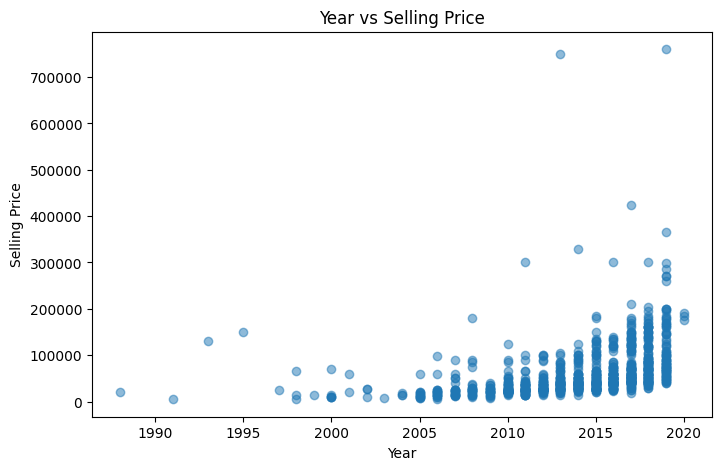

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(df_no_outliers['year'], df_no_outliers['selling_price'], alpha=0.5)
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


Q8-Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame

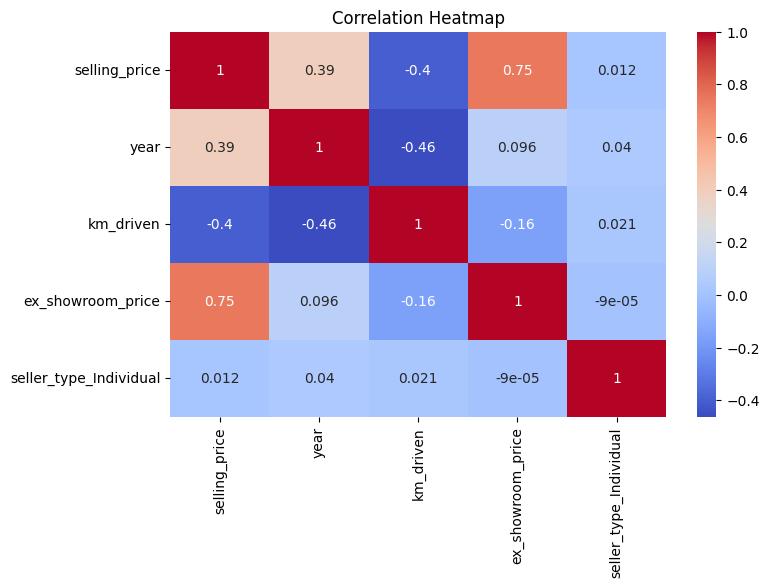

In [14]:
# Drop non-numeric columns before calculating correlation
df_numeric = df_encoded.drop(['name', 'owner'], axis=1)

plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# One-hot encode 'seller_type'
df_encoded = pd.get_dummies(df_no_outliers, columns=['seller_type'], drop_first=True)

# Display the first 5 rows
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350            72752.5                    True  
1       5650            72752.5                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            72752.5                    True  


Q9-Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


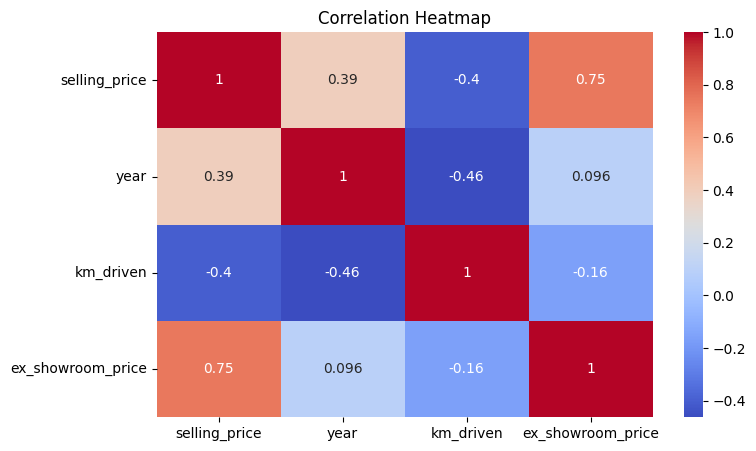

In [16]:
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Generate heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Q10-Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

Findings:

1. Factors affecting bike price:
   - Year of manufacture (newer bikes sell higher).
   - Ex-showroom price (most important driver of selling price).
   - Seller type (dealers list higher prices).
   - Ownership (first-owner bikes sell higher).
   - KM driven (more km reduces price).

2. Data Cleaning & Feature Engineering:
   - Handled 435 missing ex_showroom_price values (filled with median).
   - Removed extreme km_driven outliers using IQR.
   - Applied one-hot encoding to seller_type for ML compatibility.
